<a href="https://colab.research.google.com/github/ocaes/BrainTumourDectection/blob/main/Brain_Tumor_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code builds a **Convolutional Neural Network (CNN)** model to classify brain tumor images into two categories: **tumor** and **no tumor**. It involves a full pipeline from data preprocessing to model evaluation and user interaction via a Gradio interface. Here's a structured breakdown of how the code functions:

### 1. **Importing Libraries and Modules**
   The code begins by importing the necessary libraries:
   - **Keras** for building the CNN model.
   - **PIL (Python Imaging Library)** for image processing.
   - **NumPy** for numerical operations.
   - **Pandas** for data manipulation.
   - **Matplotlib** for plotting model performance metrics.
   - **Sklearn** for splitting the dataset and encoding categorical data (OneHotEncoder).

### 2. **Data Import from Google Drive**
   - The dataset is loaded from Google Drive using `drive.mount()` in Google Colab. The dataset contains images of brain MRI scans in two categories: **"yes" (tumor)** and **"no" (no tumor)**.
   
### 3. **Data Processing**
   - Images are resized to **128x128 pixels** and converted into **NumPy arrays**.
   - **OneHotEncoding** is used to convert the labels (0 for no tumor, 1 for tumor) into binary format.
   - The data is split into training and testing sets using **`train_test_split()`**, with 80% of data used for training and 20% for testing.

### 4. **CNN Model Architecture**
   - A **Sequential** CNN model is defined:
     - Two convolutional layers (`Conv2D`) are used with **32 filters** and **ReLU activation** to extract features.
     - **BatchNormalization** is applied to speed up training and improve stability.
     - **MaxPooling** is used to downsample the feature maps.
     - **Dropout** layers are included to prevent overfitting.
     - The output from the convolutional layers is **flattened** and passed through two dense layers.
     - A final **softmax** layer is used for binary classification (tumor/no tumor).
   
### 5. **Model Compilation and Training**
   - The model is compiled using the **Adamax optimizer** and **categorical_crossentropy loss**.
   - The model is trained for **30 epochs** with a **batch size of 40**, and the training history is stored for visualization.

### 6. **Model Evaluation and Visualization**
   - The training and validation loss are plotted using **Matplotlib** to assess the model's performance.
   
### 7. **Image Prediction**
   - The code provides functionality for loading a new image, preprocessing it, and predicting whether the image contains a tumor or not.
   - The **Gradio interface** is introduced to allow users to upload an image and receive a prediction from the trained model. This makes the model accessible through a simple web interface.

### Key Sections:
- **Data Processing**: Resizing images and preparing them for training.
- **Model Architecture**: Building the CNN using Keras' Sequential API with convolutional, pooling, and fully connected layers.
- **Training and Evaluation**: Model training with visualization of training/validation loss.
- **Gradio Interface**: A user-friendly app for making predictions via an uploaded image.



**Setting Up the Environment : Import Statements**

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.4/447.4 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130

In [ ]:
# Import the os module for interacting with the operating system (e.g., file paths)
import os

# Import the Keras library, which is used for building deep learning models
import keras

# Importing specific classes and functions from Keras for constructing a Sequential model
from keras.models import Sequential  # Sequential model allows you to build a neural network layer by layer
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
# Conv2D: Convolution layer for extracting features from image data
# MaxPooling2D: Pooling layer to down-sample the feature maps
# Flatten: Converts the 2D feature maps into a 1D vector before feeding it to dense layers
# Dense: Fully connected layer where each node is connected to every node in the previous layer
# Dropout: Regularization technique to prevent overfitting by randomly dropping some nodes during training
# BatchNormalization: Normalizes the output of each layer to speed up training and improve accuracy

# Import the Python Imaging Library (PIL) for image processing tasks
from PIL import Image

# Import NumPy for numerical operations, especially on arrays
import numpy as np

# Import Pandas for data manipulation and analysis (e.g., working with CSV files, dataframes)
import pandas as pd

# Import Matplotlib for plotting and data visualization, with 'plt' as a common alias
import matplotlib.pyplot as plt
# Set the style of the plot to have a dark background, making visualizations stand out
plt.style.use('dark_background')

# Import train_test_split from Scikit-learn to split your dataset into training and testing subsets
from sklearn.model_selection import train_test_split

# Import OneHotEncoder from Scikit



**Data** **Import**

In [ ]:
 # Import the 'drive' module from Google Colab, which provides tools to interact with Google Drive
from google.colab import drive

# Mount Google Drive to access files stored there.
# '/content/drive' is the directory where Google Drive will be mounted.
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data** **Processing**

In [ ]:
# Import OneHotEncoder from Scikit-learn
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
# Initialize a OneHotEncoder object, which is used to convert categorical data into a binary (one-hot) format.

# Fit the encoder with data (in this case, the categories 0 and 1).
encoder.fit([[0], [1]])


OneHotEncoder()

In [ ]:
#This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/drive/MyDrive/archive/brain_tumor_dataset/no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))


for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [ ]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r'/content/drive/MyDrive/archive/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [ ]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [ ]:
print(f'Total number of images: {len(data)}')

# another cell
result = np.array(result)
print(result)
result = result.reshape(139,2)

Total number of images: 139
[[[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]



**Data** **Splitting**: **Testing** **and** **Training** **Data**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data,result,test_size=0.2, shuffle=True, random_state=0)

In [ ]:
print(f'Number of images in training data: {len(x_train)}')

Number of images in training data: 111


In [ ]:
print(f'Number of images in testing data: {len(x_test)}')

Number of images in testing data: 28


**AI Model Building**

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2,2), input_shape=(128,128,3),padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2), activation = 'relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary( ))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      67,109,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,115,074 (256.02 MB)

 Trainable params: 67,115,010 (256.02 MB)

 Non-trainable params: 64 (256.00 B)

None


In [ ]:
y_train.shape

(111, 2)

**Model Evaluation**

In [ ]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - loss: 33.3346 - val_loss: 875.3135
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - loss: 35.8329 - val_loss: 221.3513
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - loss: 9.7860 - val_loss: 19.5062
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - loss: 6.2777 - val_loss: 12.9393
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - loss: 4.2815 - val_loss: 20.1176
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - loss: 3.7775 - val_loss: 13.9645
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - loss: 2.8620 - val_loss: 16.2248
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - loss: 2.0066 - val_loss: 26.0152
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - loss: 0.9939 - val_loss: 38.6581
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - loss: 0.6988 - val_loss: 47.4928
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - loss: 3.1755 - val_loss: 37.0981
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - loss: 1.0845 - val_loss: 18.8243
E

**Model Loss Plotting**

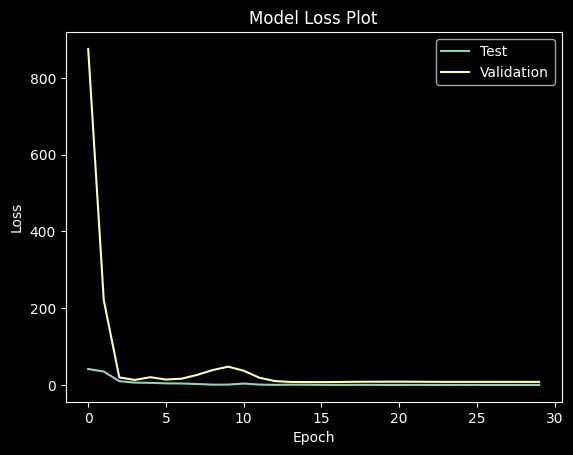

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Load the image
img = Image.open('/content/drive/MyDrive/archive/brain_tumor_dataset/no/1 no.jpeg')

# Resize the image
img = img.resize((128, 128))

# Convert the image to a NumPy array
img = np.array(img)

# Check if the image has 3 color channels
if img.shape == (128, 128):  # If grayscale, convert to RGB
    img = np.stack((img,) * 3, axis=-1)

# Add a batch dimension
img = np.expand_dims(img, axis=0)

# Make the prediction
prediction = model.predict(img)

# Get the predicted class and confidence level
predicted_class = np.argmax(prediction)
confidence = np.max(prediction)

# Print the results
if predicted_class == 0:
  print(f'The model predicts that there is no tumor. Confidence: {confidence:.2f}')
else:
  print(f'The model predicts that there is a tumor. Confidence: {confidence:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
The model predicts that there is no tumor. Confidence: 1.00


In [ ]:
!pip install gradio transformers

In [ ]:
import gradio as gr

def predict_image(image):
  # Resize the image
  img = image.resize((128, 128))

  # Convert the image to a NumPy array
  img = np.array(img)

  # Check if the image has 3 color channels
  if img.shape == (128, 128):  # If grayscale, convert to RGB
      img = np.stack((img,) * 3, axis=-1)

  # Add a batch dimension
  img = np.expand_dims(img, axis=0)

  # Make the prediction
  prediction = model.predict(img)

  # Get the predicted class and confidence level
  predicted_class = np.argmax(prediction)
  confidence = np.max(prediction)

  # Return the results
  if predicted_class == 0:
    return f'No tumor detected. Confidence: {confidence:.2f}'
  else:
    return f'Tumor detected. Confidence: {confidence:.2f}'

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs=gr.Textbox(),
    title="Brain Tumor Detection AI App",
    description="Upload an image to detect brain tumors.",
)

In [ ]:
iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0755ff4bbb710be717.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
iface.launch(share=True)

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0755ff4bbb710be717.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
model.save('brain_tumor_model.h5')

In [ ]:
from google.colab import files
files.download('brain_tumor_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import gradio as gr
import numpy as np
from PIL import Image
from keras.models import load_model

# Load your pre-trained model (make sure the model file is in the same directory)
model = load_model('brain_tumor_model.h5')

# Function to process image and make predictions
def predict_image(image):
    # Resize the image
    img = image.resize((128, 128))

    # Convert the image to a NumPy array
    img = np.array(img)

    # Check if the image has 3 color channels
    if img.shape == (128, 128):  # If grayscale, convert to RGB
        img = np.stack((img,) * 3, axis=-1)

    # Add a batch dimension
    img = np.expand_dims(img, axis=0)

    # Make the prediction
    prediction = model.predict(img)

    # Get the predicted class and confidence level
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    # Return the results
    if predicted_class == 0:
        return f'No tumor detected. Confidence: {confidence:.2f}'
    else:
        return f'Tumor detected. Confidence: {confidence:.2f}'

# Create custom CSS for background color
css = """
body {
    background-color: #f0f4f7;
}
"""

# Provide example images (these should be paths to valid images)
examples = [
    ["/content/drive/MyDrive/archive/brain_tumor_dataset/no/1 no.jpeg"],  # Replace with actual example image paths
    ["/content/drive/MyDrive/archive/brain_tumor_dataset/yes/Y1.jpg"],
    ["/content/drive/MyDrive/archive/brain_tumor_dataset/no/15 no.jpg"],
    ["/content/drive/MyDrive/archive/brain_tumor_dataset/yes/Y104.jpg"]
]

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs=gr.Textbox(),
    title="Brain Tumor Detection AI App",
    description="Upload an image to detect brain tumors.",
    css=css,  # Apply the custom background color
    theme="dark",  # Apply a dark theme to the interface
    flagging_options=["Incorrect Diagnosis", "Image Not Clear", "Model Error"],  # Add flagging options
    examples=examples  # Include 4 example images
)

# Launch the interface
iface.launch()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/blocks.py:1025: UserWarning: Cannot load dark. Caught Exception: 404 Client Error: Not Found for url: https://huggingface.co/api/spaces/dark (Request ID: Root=1-671b5ebc-210b350c39aef6b53d7ac95b;85db4a84-67a2-4503-b6c0-bd9f96cedb1b)

Sorry, we can't find the page you are looking for.
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://dab3b1ba18dee57030.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!pip freeze > requirements.txt
